In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def kmeans(img_1d, k_clusters, max_iter, init_centroids):

    if init_centroids == 'in_pixels':
        centroids = img_1d[np.random.choice(img_1d.shape[0] , size = k_clusters)]

    elif init_centroids == 'random':
        centroids = np.random.choice(255,size=(k_clusters,img_1d.shape[1]))

    for i in range(max_iter):
        d = np.linalg.norm(img_1d - centroids[: , np.newaxis] , axis = 2)

        labels = np.argmin(d , axis = 0)

        means = []
        for k in range(k_clusters):
            means.append(img_1d[labels == k].mean(axis = 0))
        means = np.array(means)
        for i in range(k_clusters):
            if len(means[i]) != 0:
                centroids[i] = means[i]

    d = np.linalg.norm(img_1d - centroids[: , np.newaxis] , axis = 2)
    labels = np.argmin(d , axis = 0)
    return centroids, labels


def recreate_image(image_np, image, img_height, img_width, init_centroids):
    output = []
    del output[:]
    output.append(image)


    for k_cluster in [3, 5, 7]:
        img_temp = image_np.copy()
        centroids, labels = kmeans(img_temp,k_cluster,5,init_centroids)

        for k in range(centroids.shape[0]):
            img_temp[labels == k] = centroids[k]
        img_temp = img_temp.reshape(img_height, img_width  , 3)
        output.append(img_temp.copy())

    plt.tight_layout();
    demo, axis = plt.subplots(1, 3, figsize = (15, 10))

    format = input ("Please enter format to export:")
    for i in range(3):
        axis[i].imshow(output[i + 1])
        plt.imsave(f'result_large{i + 1}.{format}', output[i + 1])

    plt.tight_layout();



def main(filepath='/content/sample_data/2k.jpg'):
    image=Image.open(filepath)
    plt.imshow(image)

    image_np = np.array(image)
    img_height= image_np.shape[0]
    img_width = image_np.shape[1]
    image_np = image_np.reshape(img_height*img_width, image_np.shape[2])

    recreate_image(image_np, image, img_height, img_width, 'random')

<ipython-input-1-53d2f19fc59a>:20: RuntimeWarning: Mean of empty slice.
  means.append(img_1d[labels == k].mean(axis = 0))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Please enter format to export:png


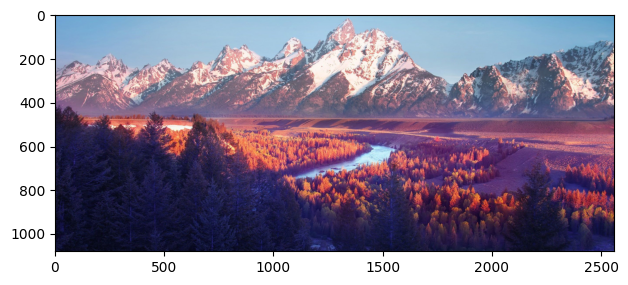

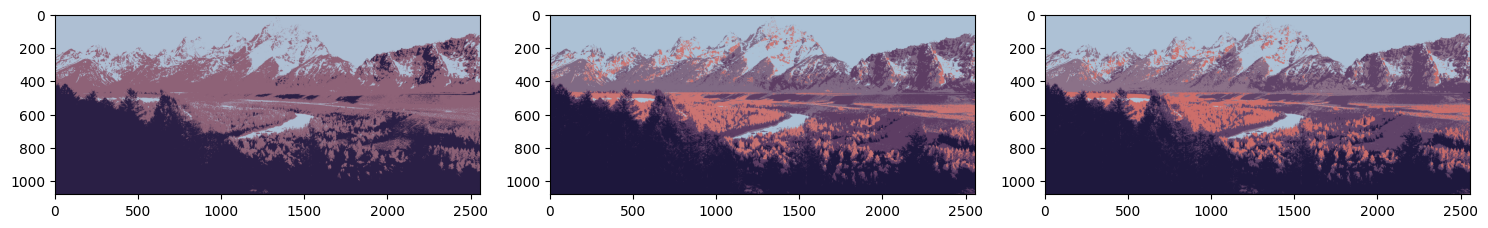

In [2]:
main()

Please enter format to export:png


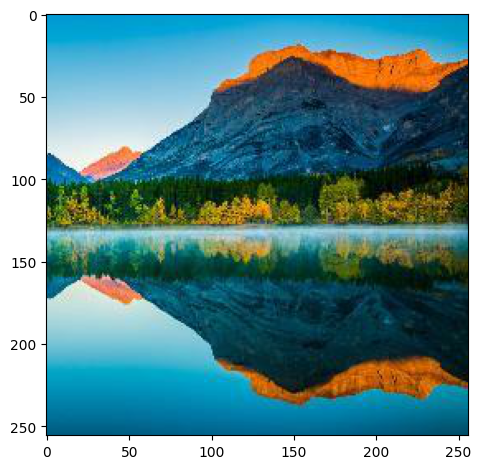

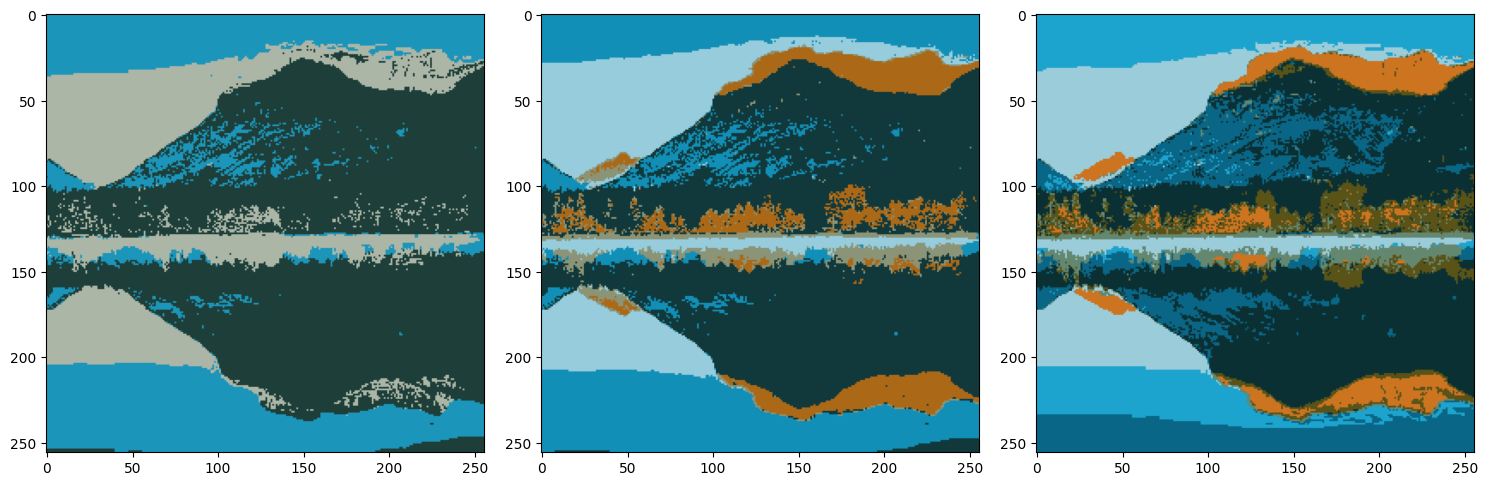

In [5]:
main('/content/sample_data/small.jpg')